# ``detectda`` demo

In the below, <code>test_video.pkl</code> is the output of the "identify_polygon" python script, <br>
which allows choose your desired polygonal subregion.

In [1]:
from skimage import io, filters
import detectda as dtda
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2

"""
Here we divide each pixel by 32 (div=32) and round to the nearest integer because of various properties
of the detector which captured the video. Outside of hypothesis testing context, it is fine to set div equal to
its default value of div=1!
"""

impol = dtda.ImageSeriesPickle('detectda/tests/test_video.pkl', div=32, n_jobs=2)

# Calculate persistent homology

Fit the persistence diagrams for every image in the polygonal region of the test video. We found that $\sigma=2$ was a good smoothing parameter for these nanoparticle videos.

In [2]:
impol.fit(sigma=2)

Video processed in 20.2082 seconds


# Visualize the results of the fit

See where the homology generators appears and how long they live. Below, we see the raw image with the points of the $0^{th}$ persistence diagram overlaid, after removing points with lifetimes less than <code>thr</code>.

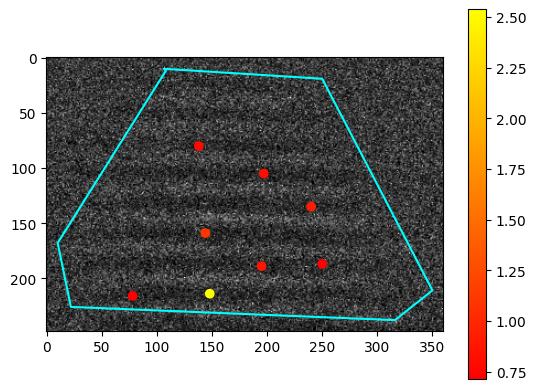

In [3]:
impol.plot_im(73, thr=0.7, smooth=False)

# Calculate summaries

Run these routines to get persistent entropy and the ALPS statistic

In [4]:
impol.get_pers_entr(neg=False)
impol.get_alps()

# Plot the summaries

Plot the ALPS statistic across all the frames

Text(0, 0.5, 'ALPS statistic')

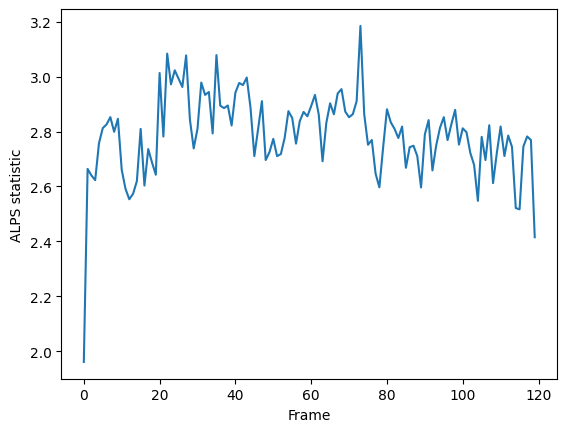

In [5]:
plt.plot(impol.alps) #or impol.pers_entr
plt.xlabel('Frame')
plt.ylabel('ALPS statistic')

# Hypothesis testing

Run hypothesis testing using the observed image series above, by generating 500 Monte Carlo noise images

In [6]:
G = open('detectda/tests/test_video_vacuum.pkl', 'rb')
tv_vacuum = pickle.load(G)['video']
impol_vac = dtda.VacuumSeries(tv_vacuum, observed_ImageSeries=impol, parametric=False, div=32)
impol_vac.fit(convert_to_int=True)
impol_vac.transform(500, "alps", conservative=True)

# Plot the test results

Plot the results of the hypothesis testing

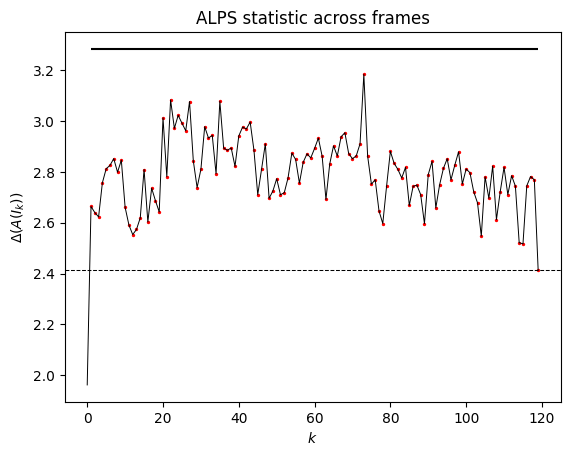

In [7]:
impol_vac.plot_hypo()